### Objective:

Develop a model to predict cost vs. number of units sold using polynomial regression
- Independence variable X: number of units produced
- Dependence variable Y: cost of good sold

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Understanding

In [2]:
cost_df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Material\\ML Regression Course Package\\5. Polynomial Regression\\EconomiesOfScale.csv")

In [3]:
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
cost_df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [5]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
cost_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Units,1000.0,4.472799,1.336241,1.0,3.594214,4.435958,5.324780,10.0
Manufacturing Cost,1000.0,40.052999,10.595322,20.0,32.912036,38.345781,44.531822,100.0


In [7]:
display(cost_df.shape)
display(cost_df.columns)

(1000, 2)

Index(['Number of Units', 'Manufacturing Cost'], dtype='object')

In [8]:
cost_df.isnull().sum()

Number of Units       0
Manufacturing Cost    0
dtype: int64

In [9]:
cost_df.duplicated().sum()

0

### Visualize Dataset

<Figure size 800x600 with 0 Axes>

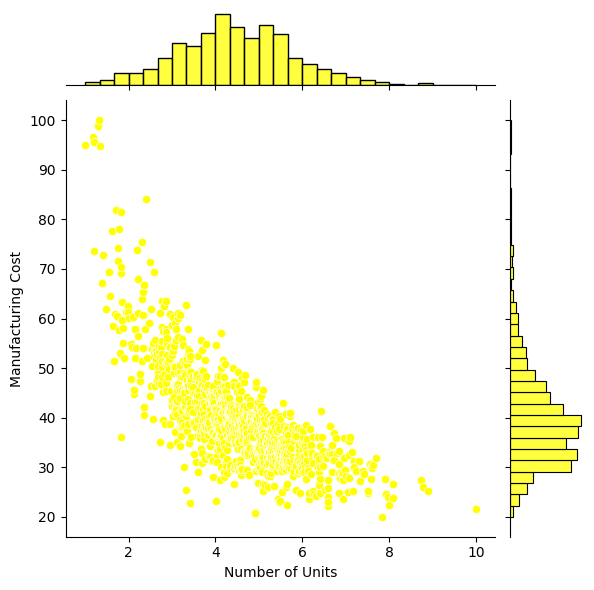

In [10]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data=cost_df, color='yellow')
plt.show()

<Figure size 800x600 with 0 Axes>

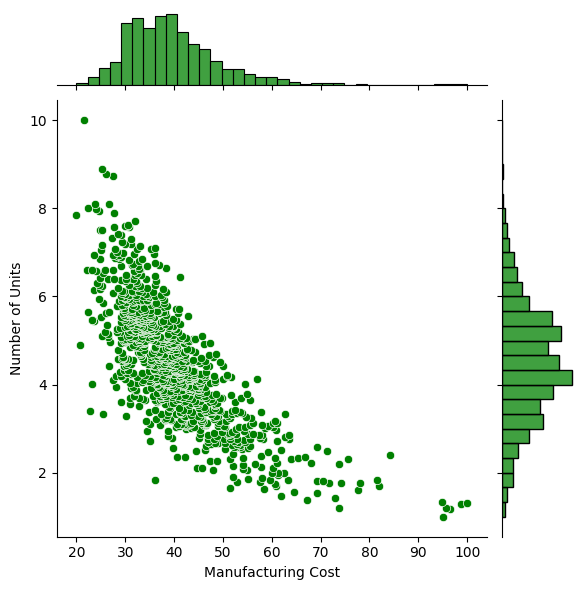

In [11]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Manufacturing Cost', y='Number of Units', data=cost_df, color='green')
plt.show()

<Figure size 800x600 with 0 Axes>

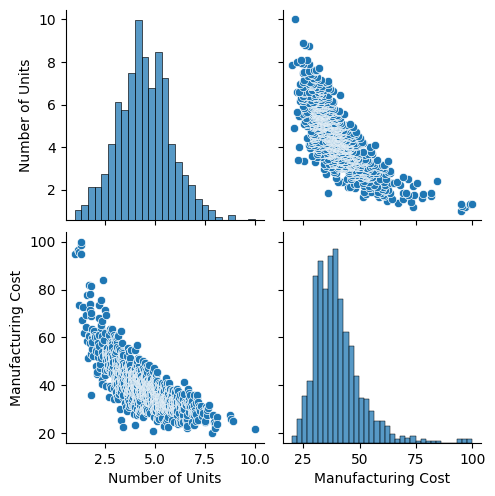

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(data=cost_df)
plt.show()

<Figure size 800x600 with 0 Axes>

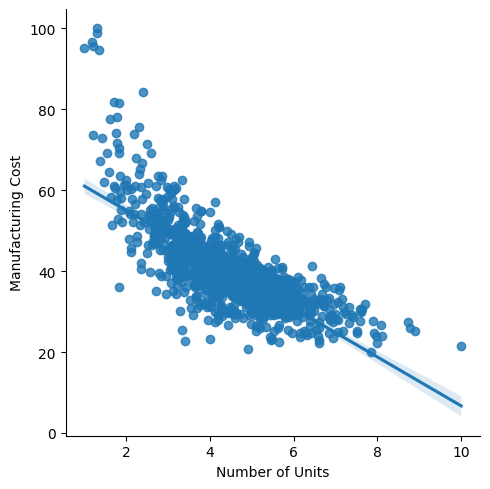

In [13]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=cost_df)
plt.show()

<Figure size 800x600 with 0 Axes>

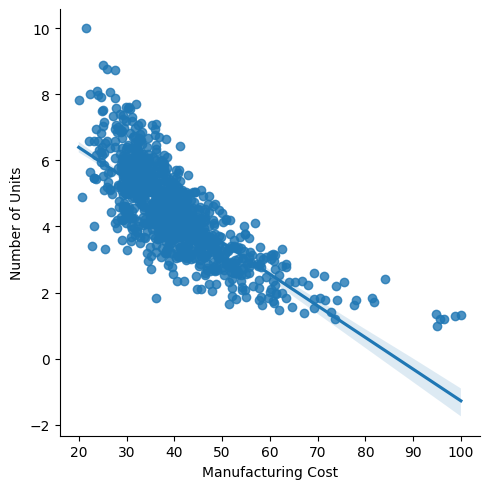

In [14]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Manufacturing Cost', y='Number of Units', data=cost_df)
plt.show()

### Create Train and Test Set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = cost_df[['Number of Units']]
y = cost_df['Manufacturing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,Number of Units
29,1.865228
535,4.548429
695,5.112873
557,4.616828
836,5.665156
...,...
106,2.834925
270,3.680402
860,5.855097
435,4.242124


In [18]:
y_train

29     55.036139
535    43.816361
695    41.611214
557    48.034208
836    33.554747
         ...    
106    48.723598
270    43.563355
860    37.939400
435    44.845931
102    57.488360
Name: Manufacturing Cost, Length: 800, dtype: float64

In [19]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(800, 1)

(800,)

(200, 1)

(200,)

### Train the Models

#### Linear Assumption

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Linear Model coeff (m):', lr.coef_)
print('Linear Model coeff (b):', lr.intercept_)

Linear Model coeff (m): [-6.21850698]
Linear Model coeff (b): 67.89012908512075


In [23]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [24]:
print('Linear Model coeff (m):', lr2.coef_)
print('Linear Model coeff (b):', lr2.intercept_)

Linear Model coeff (m): [7.750607]
Linear Model coeff (b): 0.0


In [25]:
y_pred_lr = lr.predict(X_train)
y_pred_lr2 = lr2.predict(X_train)

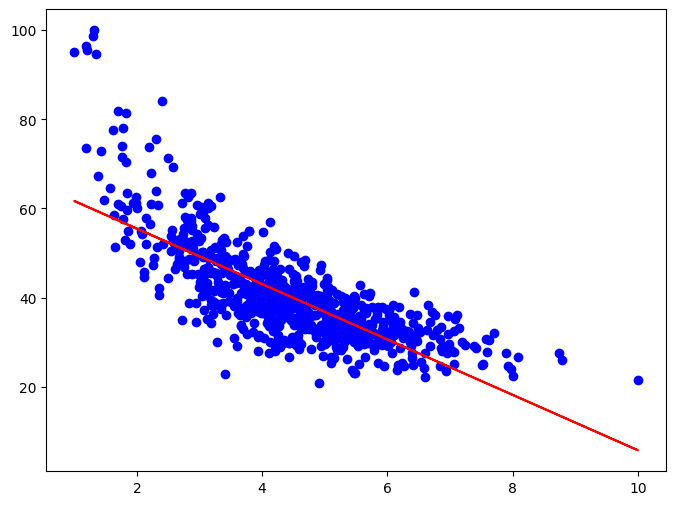

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred_lr, color='red')

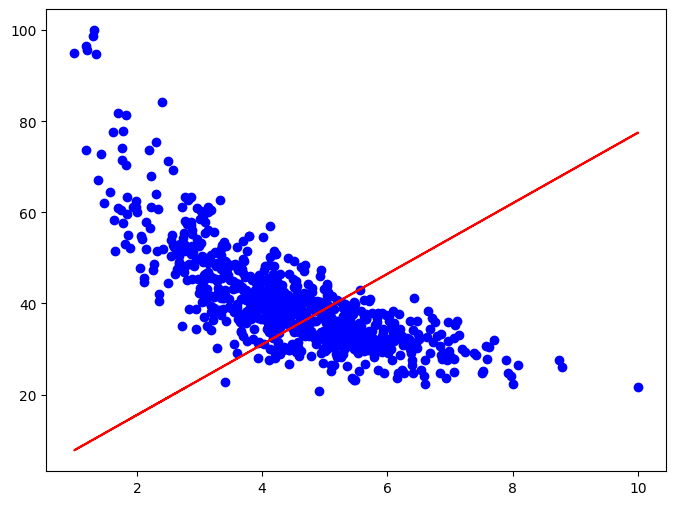

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred_lr2, color='red')

#### Polynomial Assumption

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
pl2 = PolynomialFeatures(degree=2)
X_columns2 = pl2.fit_transform(X_train)

In [30]:
X_columns2

array([[ 1.        ,  1.86522775,  3.47907457],
       [ 1.        ,  4.54842911, 20.68820735],
       [ 1.        ,  5.11287348, 26.14147523],
       ...,
       [ 1.        ,  5.85509721, 34.2821633 ],
       [ 1.        ,  4.24212411, 17.99561697],
       [ 1.        ,  2.79408325,  7.80690121]])

In [31]:
poly2 = LinearRegression()
poly2.fit(X_columns2, y_train)

LinearRegression()

In [32]:
print('Model Coeff:', poly2.coef_)

Model Coeff: [  0.         -17.81636965   1.27181952]


In [33]:
pl3 = PolynomialFeatures(degree=3)
X_columns3 = pl3.fit_transform(X_train)

In [34]:
X_columns3

array([[  1.        ,   1.86522775,   3.47907457,   6.48926643],
       [  1.        ,   4.54842911,  20.68820735,  94.09884451],
       [  1.        ,   5.11287348,  26.14147523, 133.65805547],
       ...,
       [  1.        ,   5.85509721,  34.2821633 , 200.72539861],
       [  1.        ,   4.24212411,  17.99561697,  76.33964065],
       [  1.        ,   2.79408325,   7.80690121,  21.81313192]])

In [35]:
poly3 = LinearRegression()
poly3.fit(X_columns3, y_train)

LinearRegression()

In [36]:
print('Model Coeff:', poly3.coef_)

Model Coeff: [  0.         -34.51814321   5.05171512  -0.26070502]


In [37]:
pl4 = PolynomialFeatures(degree=4)
X_columns4 = pl4.fit_transform(X_train)

In [38]:
X_columns4

array([[1.00000000e+00, 1.86522775e+00, 3.47907457e+00, 6.48926643e+00,
        1.21039598e+01],
       [1.00000000e+00, 4.54842911e+00, 2.06882074e+01, 9.40988445e+01,
        4.28001923e+02],
       [1.00000000e+00, 5.11287348e+00, 2.61414752e+01, 1.33658055e+02,
        6.83376727e+02],
       ...,
       [1.00000000e+00, 5.85509721e+00, 3.42821633e+01, 2.00725399e+02,
        1.17526672e+03],
       [1.00000000e+00, 4.24212411e+00, 1.79956170e+01, 7.63396407e+01,
        3.23842230e+02],
       [1.00000000e+00, 2.79408325e+00, 7.80690121e+00, 2.18131319e+01,
        6.09477066e+01]])

In [39]:
poly4 = LinearRegression()
poly4.fit(X_columns4, y_train)

LinearRegression()

In [40]:
print('Model Coeff:', poly4.coef_)

Model Coeff: [ 0.00000000e+00 -5.48053513e+01  1.21644641e+01 -1.26644861e+00
  4.90848244e-02]


In [41]:
pl5 = PolynomialFeatures(degree=5)
X_columns5 = pl5.fit_transform(X_train)

In [42]:
X_columns5

array([[1.00000000e+00, 1.86522775e+00, 3.47907457e+00, 6.48926643e+00,
        1.21039598e+01, 2.25766418e+01],
       [1.00000000e+00, 4.54842911e+00, 2.06882074e+01, 9.40988445e+01,
        4.28001923e+02, 1.94673641e+03],
       [1.00000000e+00, 5.11287348e+00, 2.61414752e+01, 1.33658055e+02,
        6.83376727e+02, 3.49401875e+03],
       ...,
       [1.00000000e+00, 5.85509721e+00, 3.42821633e+01, 2.00725399e+02,
        1.17526672e+03, 6.88130089e+03],
       [1.00000000e+00, 4.24212411e+00, 1.79956170e+01, 7.63396407e+01,
        3.23842230e+02, 1.37377893e+03],
       [1.00000000e+00, 2.79408325e+00, 7.80690121e+00, 2.18131319e+01,
        6.09477066e+01, 1.70292966e+02]])

In [43]:
poly5 = LinearRegression()
poly5.fit(X_columns5, y_train)

LinearRegression()

In [44]:
print('Model Coeff:', poly5.coef_)

Model Coeff: [ 0.00000000e+00 -9.54138252e+01  3.19305847e+01 -5.63692225e+00
  4.94554373e-01 -1.69105527e-02]


In [90]:
pl10 = PolynomialFeatures(degree=10)
X_columns10 = pl10.fit_transform(X_train)

In [91]:
X_columns10

array([[1.00000000e+00, 1.86522775e+00, 3.47907457e+00, ...,
        1.46505844e+02, 2.73266766e+02, 5.09704755e+02],
       [1.00000000e+00, 4.54842911e+00, 2.06882074e+01, ...,
        1.83185646e+05, 8.33206926e+05, 3.78978264e+06],
       [1.00000000e+00, 5.11287348e+00, 2.61414752e+01, ...,
        4.67003751e+05, 2.38773110e+06, 1.22081670e+07],
       ...,
       [1.00000000e+00, 5.85509721e+00, 3.42821633e+01, ...,
        1.38125186e+06, 8.08736394e+06, 4.73523020e+07],
       [1.00000000e+00, 4.24212411e+00, 1.79956170e+01, ...,
        1.04873790e+05, 4.44887634e+05, 1.88726856e+06],
       [1.00000000e+00, 2.79408325e+00, 7.80690121e+00, ...,
        3.71462293e+03, 1.03789657e+04, 2.89996943e+04]])

In [92]:
poly10 = LinearRegression()
poly10.fit(X_columns10, y_train)

LinearRegression()

In [93]:
print('Model Coeff:', poly10.coef_)

Model Coeff: [ 0.00000000e+00  1.10236664e+03 -1.74008207e+03  1.39096257e+03
 -6.61711875e+02  2.00205730e+02 -3.95124534e+01  5.06585938e+00
 -4.06352797e-01  1.85063125e-02 -3.64842791e-04]


In [94]:
y_pred_poly2 = poly2.predict(pl2.fit_transform(X_train))
y_pred_poly3 = poly3.predict(pl3.fit_transform(X_train))
y_pred_poly4 = poly4.predict(pl4.fit_transform(X_train))
y_pred_poly5 = poly5.predict(pl5.fit_transform(X_train))
y_pred_poly10 = poly10.predict(pl10.fit_transform(X_train))

In [95]:
def plot_polynomial(X_train, y_train, y_pred):
    if isinstance(X_train, (pd.DataFrame, pd.Series)):
        X_train_np = X_train.to_numpy().flatten()
    else:
        X_train_np = X_train.flatten()
    
    sorted_indices = np.argsort(X_train_np)
    sorted_X_train = X_train_np[sorted_indices]
    sorted_y_pred = y_pred[sorted_indices]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_np, y_train, color='gray')
    plt.plot(sorted_X_train, sorted_y_pred, color='blue')
    plt.show()

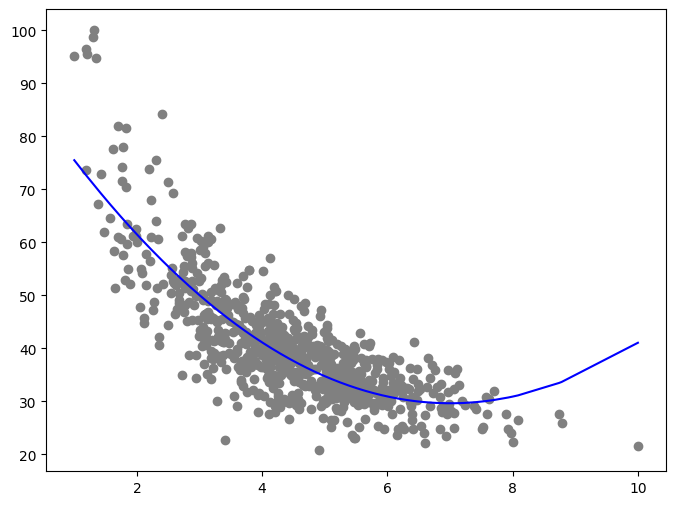

In [55]:
plot_polynomial(X_train, y_train, y_pred_poly2)

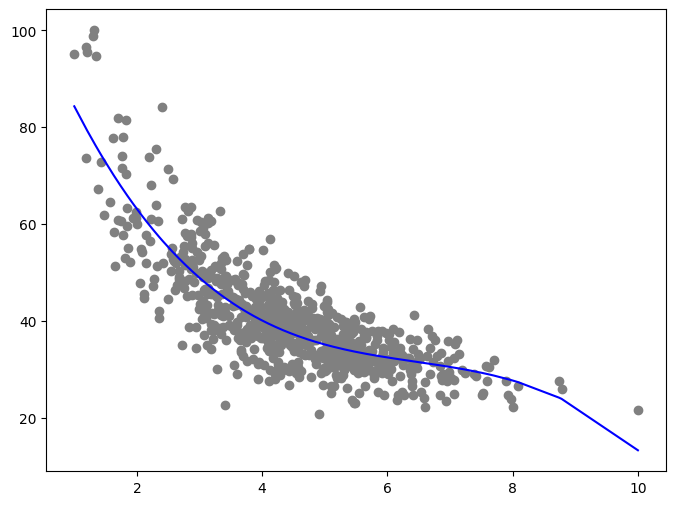

In [56]:
plot_polynomial(X_train, y_train, y_pred_poly3)

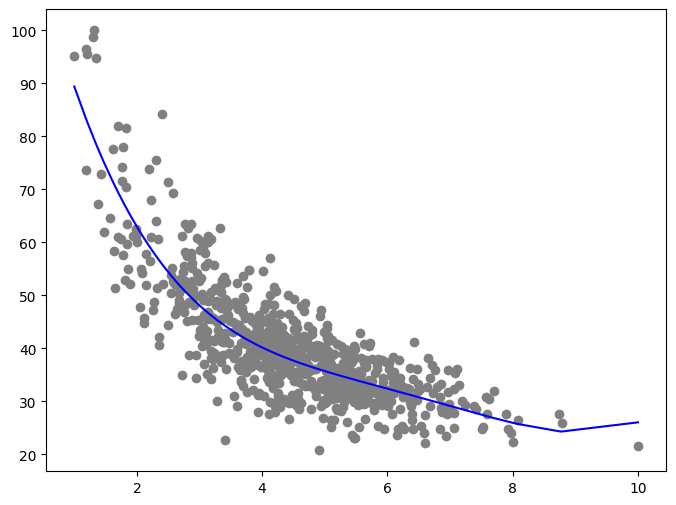

In [57]:
plot_polynomial(X_train, y_train, y_pred_poly4)

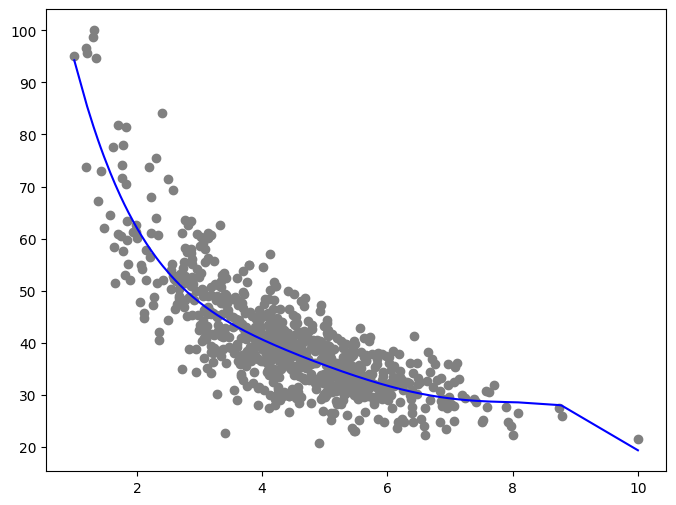

In [58]:
plot_polynomial(X_train, y_train, y_pred_poly5)

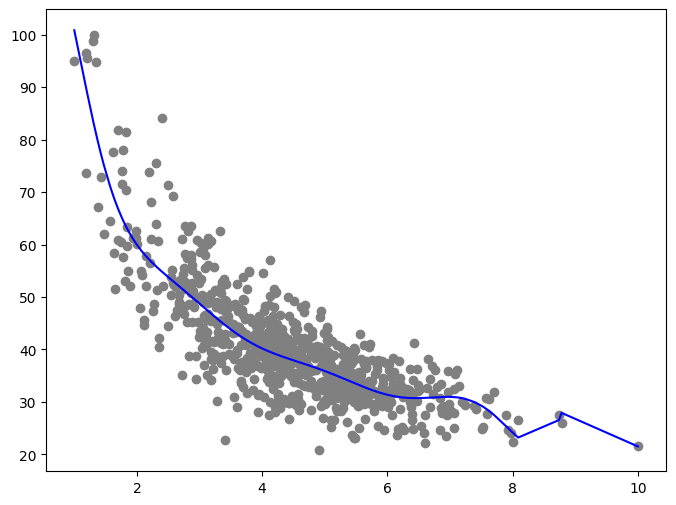

In [96]:
plot_polynomial(X_train, y_train, y_pred_poly10)

### Apply Models in Test Set

In [67]:
y_pred_test_lr = lr.predict(X_test)
y_pred_test_lr2 = lr2.predict(X_test)

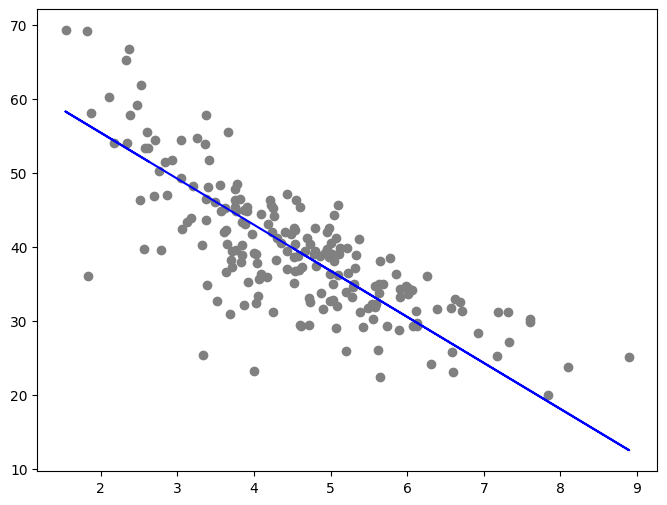

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred_test_lr, color='blue')

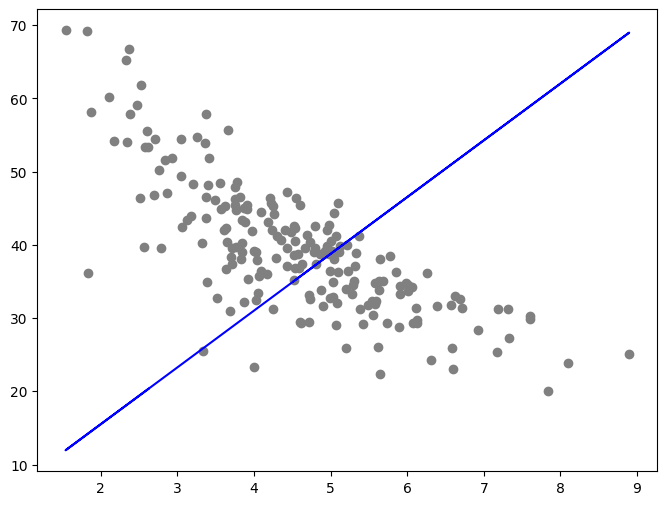

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred_test_lr2, color='blue')

In [97]:
y_pred_test_poly2 = poly2.predict(pl2.fit_transform(X_test))
y_pred_test_poly3 = poly3.predict(pl3.fit_transform(X_test))
y_pred_test_poly4 = poly4.predict(pl4.fit_transform(X_test))
y_pred_test_poly5 = poly5.predict(pl5.fit_transform(X_test))
y_pred_test_poly10 = poly10.predict(pl10.fit_transform(X_test))

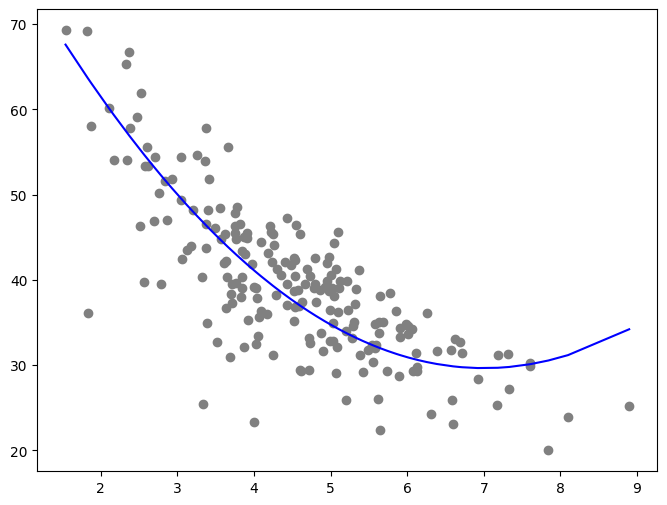

In [71]:
plot_polynomial(X_test, y_test, y_pred_test_poly2)

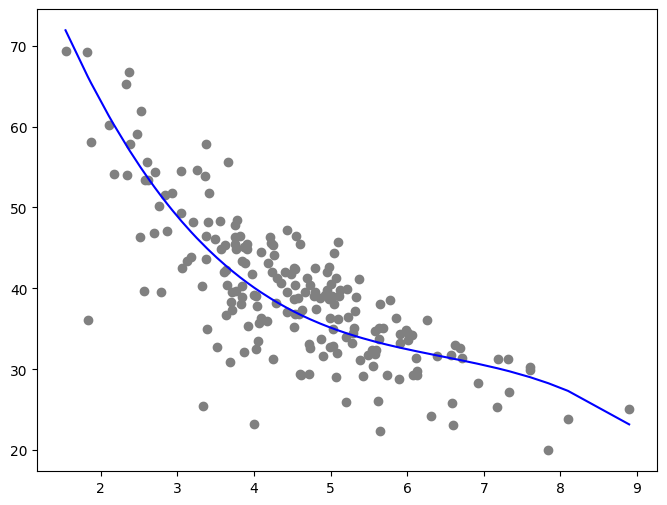

In [76]:
plot_polynomial(X_test, y_test, y_pred_test_poly3)

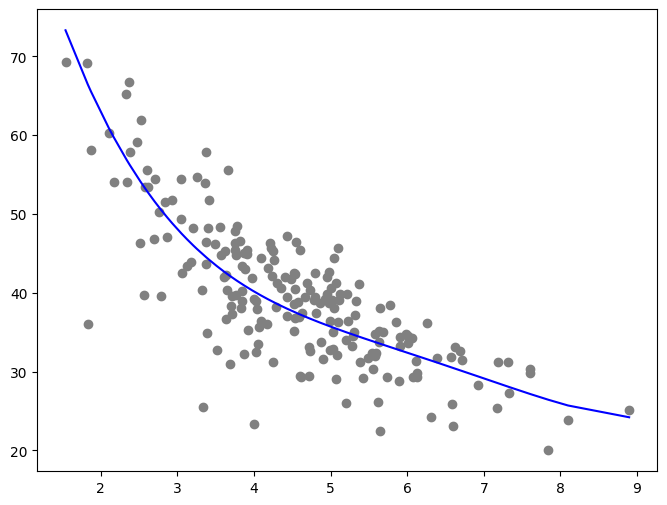

In [77]:
plot_polynomial(X_test, y_test, y_pred_test_poly4)

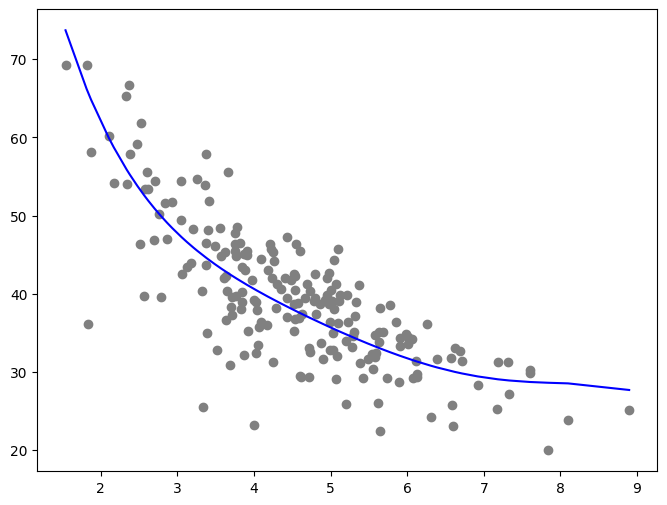

In [78]:
plot_polynomial(X_test, y_test, y_pred_test_poly5)

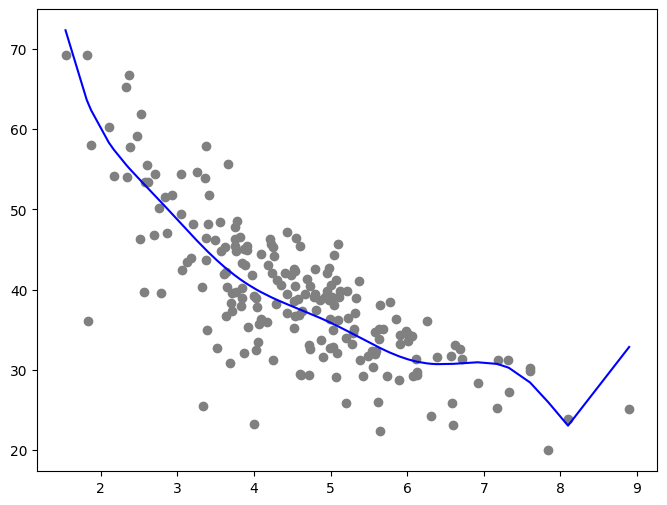

In [98]:
plot_polynomial(X_test, y_test, y_pred_test_poly10)

### Model Evaluation

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#### Training Set Evaluation

In [81]:
def evaluate_model(y_true, y_pred, X_train, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    n = len(y_true)
    p = X_train.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    metrics_df = pd.DataFrame({
        'R-squared': [r2],
        'Mean Absolute Error': [mae],
        'Mean Squared Error': [mse],
        'Root Mean Squared Error': [rmse],
        'Mean Absolute Percentage Error': [mape],
        'Adjusted R-squared': [adjusted_r2]
    }, index=[model_name])
    
    formatted_metrics_df = metrics_df.style.format("{:.6f}").highlight_max(axis=0)
    return formatted_metrics_df

In [100]:
display(evaluate_model(y_train, y_pred_lr, X_train, 'Linear Regression'))
display(evaluate_model(y_train, y_pred_lr2, X_train, 'Linear Regression (no intercept)'))
display(evaluate_model(y_train, y_pred_poly2, X_train, 'Polynomial Regression (2-Degree)'))
display(evaluate_model(y_train, y_pred_poly3, X_train, 'Polynomial Regression (3-Degree)'))
display(evaluate_model(y_train, y_pred_poly4, X_train, 'Polynomial Regression (4-Degree)'))
display(evaluate_model(y_train, y_pred_poly5, X_train, 'Polynomial Regression (5-Degree)'))
display(evaluate_model(y_train, y_pred_poly10, X_train, 'Polynomial Regression (10-Degree)'))

,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Linear Regression,0.579692,5.053413,50.299188,7.092192,0.129081,0.579166


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Linear Regression (no intercept),-2.609669,15.400603,431.977345,20.784065,0.368057,-2.614193


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (2-Degree),0.676169,4.615917,38.753553,6.225235,0.116794,0.675764


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (3-Degree),0.700578,4.541783,35.832562,5.986031,0.114682,0.700202


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (4-Degree),0.706101,4.502111,35.171553,5.930561,0.113712,0.705733


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (5-Degree),0.709458,4.458309,34.769846,5.896596,0.112797,0.709094


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (10-Degree),0.714872,4.425043,34.121893,5.841395,0.112093,0.714515


#### Test Set Evaluation

In [101]:
display(evaluate_model(y_test, y_pred_test_lr, X_test, 'Linear Regression'))
display(evaluate_model(y_test, y_pred_test_lr2, X_test, 'Linear Regression (no intercept)'))
display(evaluate_model(y_test, y_pred_test_poly2, X_test, 'Polynomial Regression (2-Degree)'))
display(evaluate_model(y_test, y_pred_test_poly3, X_test, 'Polynomial Regression (3-Degree)'))
display(evaluate_model(y_test, y_pred_test_poly4, X_test, 'Polynomial Regression (4-Degree)'))
display(evaluate_model(y_test, y_pred_test_poly5, X_test, 'Polynomial Regression (5-Degree)'))
display(evaluate_model(y_test, y_pred_test_poly10, X_test, 'Polynomial Regression (10-Degree)'))

,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Linear Regression,0.569590,4.513944,35.197389,5.932739,0.123820,0.567416


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Linear Regression (no intercept),-3.252766,14.372445,347.775738,18.648746,0.364747,-3.274245


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (2-Degree),0.593690,4.372293,33.226567,5.764249,0.119000,0.591638


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (3-Degree),0.605170,4.282632,32.287774,5.682233,0.115208,0.603176


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (4-Degree),0.614049,4.245119,31.561637,5.617974,0.113732,0.612100


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (5-Degree),0.614760,4.269145,31.503539,5.612801,0.114762,0.612814


,R-squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Adjusted R-squared
Polynomial Regression (10-Degree),0.622572,4.237094,30.864727,5.555603,0.113822,0.620665
